In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


model = keras.Sequential([
    tf.keras.Input(shape=(784,)),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=10, activation="softmax")
])
df = pd.read_csv("train.csv")
X = df.drop("label", axis=1)
y = df["label"]
X = X/255.0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model.summary()
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)





In [2]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    batch_size=32,
    epochs=45
)

Epoch 1/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4322 - loss: 1.6292 - val_accuracy: 0.8863 - val_loss: 0.3937
Epoch 2/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8402 - loss: 0.5162 - val_accuracy: 0.9177 - val_loss: 0.2737
Epoch 3/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8928 - loss: 0.3654 - val_accuracy: 0.9320 - val_loss: 0.2258
Epoch 4/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9097 - loss: 0.3008 - val_accuracy: 0.9420 - val_loss: 0.1947
Epoch 5/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9289 - loss: 0.2358 - val_accuracy: 0.9483 - val_loss: 0.1705
Epoch 6/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9331 - loss: 0.2215 - val_accuracy: 0.9529 - val_loss: 0.1536
Epoch 7/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9437 - loss: 0.1915 - val_accuracy: 0.9568 - val_loss: 0.1449
Epoch 8/45
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9506 - loss: 0.170

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


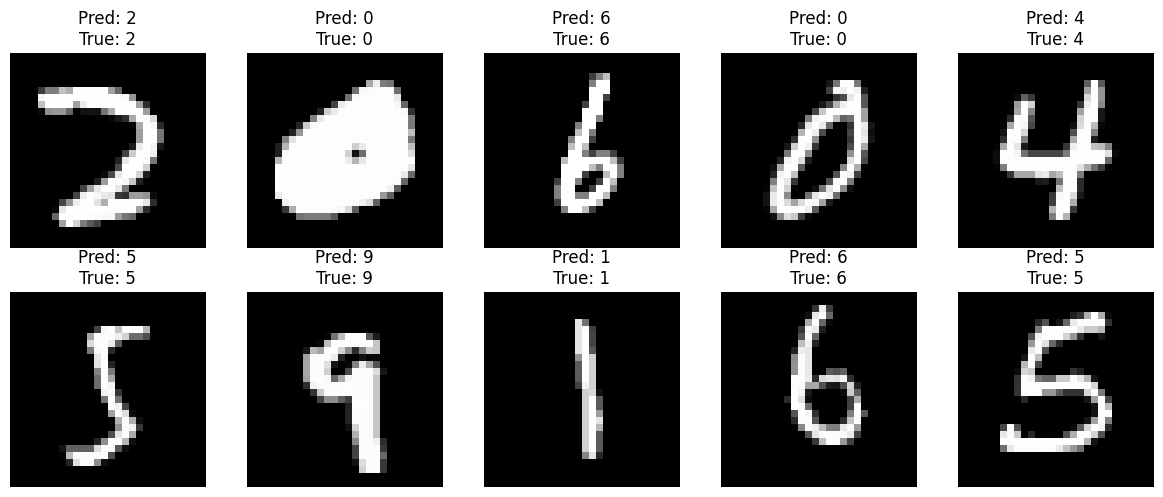

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax output to class labels
actual_labels = np.argmax(Y_test, axis=1)  # Convert one-hot encoding back to labels

# Select random samples for visualization
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test.iloc[random_indices].to_numpy().reshape(-1, 28, 28)  # Reshape into 28x28 images
sample_predictions = predicted_labels[random_indices]
sample_actuals = actual_labels[random_indices]

# Plot images with predictions
plt.figure(figsize=(12, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap="gray")
    plt.title(f"Pred: {sample_predictions[i]}\nTrue: {sample_actuals[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

